In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv(r"/content/googleplaystore.csv")

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000



# **Problems in data:**






1.   Mising values

 *   Rating -> 1474
 *   Type -> 1
 *   Content Rating ->	1
 *   Current Ver ->	8
 *   Android Ver	-> 3

2.   Duplicated data

 *   483 duplicated rows

3.   Some columns are stored as object but should be numeric
 *  Rating
 *  Reviews
 *  Installs
 *  Size
 * Price
 * Current Ver
 * Android Ver

4. The 'Genres' column consists of a main genre and a sub-genre separated by a semicolon (;)





















# Preprocessing Data

In [38]:
# Check mising values
df.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [39]:
# drop missing values in ( Type, Content Rating, Current Ver, Android Ver)
cols_with_missing_values = [ "Type", "Content Rating", "Current Ver", "Android Ver"]
df = df.dropna(subset=cols_with_missing_values)


In [40]:
# check duplicates
df.duplicated().sum()

np.int64(483)

In [41]:
# drop duplicates
df.drop_duplicates(inplace=True)

####**Fix Rating** :
* Convert Rating to numeric
* Remove outliers (values > 5)
* Handle missing values




In [42]:
df['Rating'].unique()


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , nan, 4.8, 4.9,
       3.6, 3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [43]:
#Convert Rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'])


In [45]:
df['Rating'].dtype

dtype('float64')

In [44]:
# Remove outliers (values > 5)
# Rating has values > 5 (wrong values)
df = df[df['Rating']<=5]


In [46]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [47]:
#Handle missing values
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())


In [48]:
df.isna().sum() # no missing values more

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


####**Fix Reviews** :
*   Convert Reviews to numeric


In [52]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [53]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [54]:
df['Reviews'].dtype

dtype('int64')

####**Fix Size**  :


*   split size column to size_val , size_unit to know all units (KB,MB)
*   Convert all sizes to KB


*   convert the size to numeric value (val='Varies with device' -> converted to nan)






In [56]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [69]:
df[df['Size']=='Varies with device'].shape

(1468, 15)

In [60]:
# split size column to size_val , size_unit
df['size_val'] = df['Size'].str[:-1]
df['size_unit'] = df['Size'].str[-1]

In [68]:
df['size_val'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '23',
       '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', 'Varies with devic',
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '201', '3.6', '5.7', '8.6', '2.4', '27', '2.7', '2.5', '7.0',
       '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1',
       '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '22',
       '6.4', '3.2', '8.2', '4.9', '9.5', '5.0', '5.9', '13', '73', '6.8',
       '3.5', '4.0', '2.3', '2.1', '42', '9.1', '55', '7.3', '6.5', '1.5',
       '7.5', '51', '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3',
       '40', '7.8', '8.8', '6.6', '5.1', '61', '66', '79', '8.4', '3.7',
       '118', '44', '695', '1.6', '6.2', '53', '1.4', '3.0', '7.2', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '70', '9.3', '8.1',
       '36', '6.9', '7.4', '84', '97', '2.0', '1.

In [67]:
df['size_unit'].unique()

array(['M', 'e', 'k'], dtype=object)

In [70]:
# convert all values to KB
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')

In [71]:
df.drop(['size_val', 'size_unit'],axis=1,inplace=True)

In [74]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

#### **Fix Installs**
*   handle (+ and ,)
*   convert installs to int



In [75]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [208]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = pd.to_numeric(df['Installs'])

#### **Fix Price**


*   convert price to numeric value
*   after conveting col has left skeweness




In [76]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [77]:
# Replace $ with empty str
df['Price'] = df['Price'].str.replace('$','', regex=False)

In [78]:
# convert the column to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [79]:
df['Price'].describe()

,Price
count,8886.000000
mean,0.963526
std,16.194792
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


#### **Fix Current Ver**

In [90]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

#### **Fix Android Ver**

In [91]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

#### **Fix Geners**
*  split the column to (main Genre , Sub Genre)

In [116]:
df['main_genre'] = df['Genres'].str.split(';').str[0]
df['sub_genre'] = df['Genres'].str.split(';').str[1]

In [117]:
df[['Genres','main_genre','sub_genre']]

,Genres,main_genre,sub_genre
0,Art & Design,Art & Design,NaN
1,Art & Design;Pretend Play,Art & Design,Pretend Play
2,Art & Design,Art & Design,NaN
3,Art & Design,Art & Design,NaN
4,Art & Design;Creativity,Art & Design,Creativity
...,...,...,...
10834,Education,Education,NaN
10836,Education,Education,NaN
10837,Education,Education,NaN
10839,Books & Reference,Books & Reference,NaN


# EDA

#### 1.	What is the most expensive app on the Play Store?




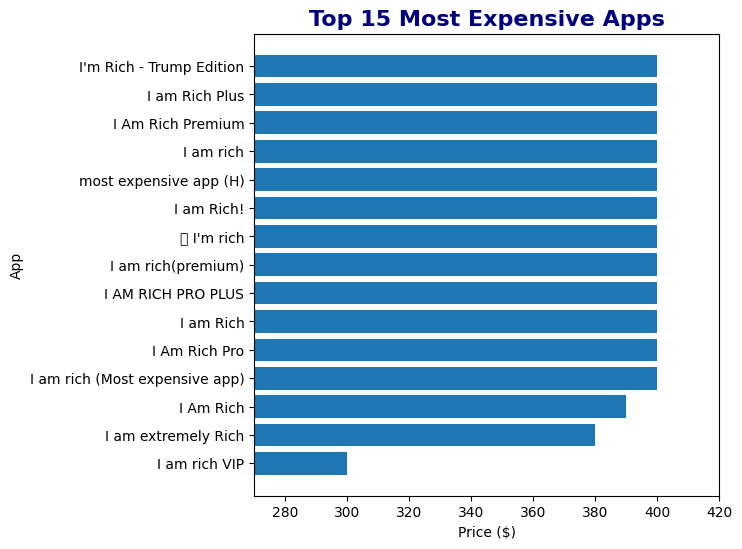

In [125]:
df_top_price = df.sort_values(by='Price', ascending=False).head(15)
plt.figure(figsize=(6,6))
plt.barh(df_top_price['App'], df_top_price['Price'])
plt.gca().invert_yaxis()
plt.xlabel('Price ($)')
plt.ylabel('App')
plt.title("Top 15 Most Expensive Apps", fontsize=16, fontweight='bold', color='navy')
plt.xlim(270,420)
plt.show()

In [215]:
df_top_price[['App','Price']]

,App,Price
4367,I'm Rich - Trump Edition,400.00
5354,I am Rich Plus,399.99
5356,I Am Rich Premium,399.99
5351,I am rich,399.99
4197,most expensive app (H),399.99
5358,I am Rich!,399.99
4362,💎 I'm rich,399.99
5359,I am rich(premium),399.99
5373,I AM RICH PRO PLUS,399.99
5369,I am Rich,399.99


In [220]:
print("I'm Rich - Trump Edition :is the most expensive app on the Play Store with price = 400 ")

I'm Rich - Trump Edition :is the most expensive app on the Play Store with price = 400 


#### 2.	Which genre has the highest number of apps?





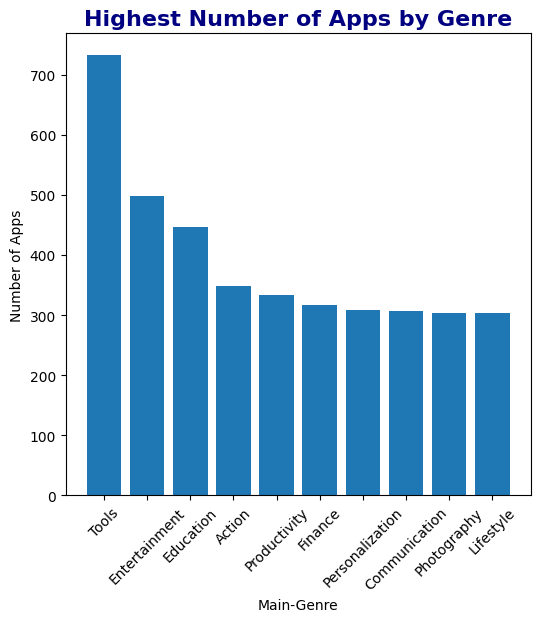

In [123]:
df_hightest_genre = df['Genres'].value_counts().head(10)
plt.figure(figsize=(6,6))
plt.bar(df_hightest_genre.index, df_hightest_genre.values)
plt.xlabel('Main-Genre')
plt.ylabel('Number of Apps')
plt.title("Highest Number of Apps by Genre", fontsize=16, fontweight='bold', color='navy')
plt.xticks(rotation=45)
plt.show()  # Tools has the highest number of apps

#### 3.	What is the average size of free vs. paid apps?

In [221]:
df_avg_size_free_paid = df.groupby('Type')['Size'].mean()

In [223]:
# average size of free vs. paid apps
df_avg_size_free_paid

,Size
Type,
Free,21024.163538
Paid,18842.455413


/tmp/ipython-input-3145596333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_avg_size_free_paid.index ,y=df_avg_size_free_paid.values, palette="Blues")


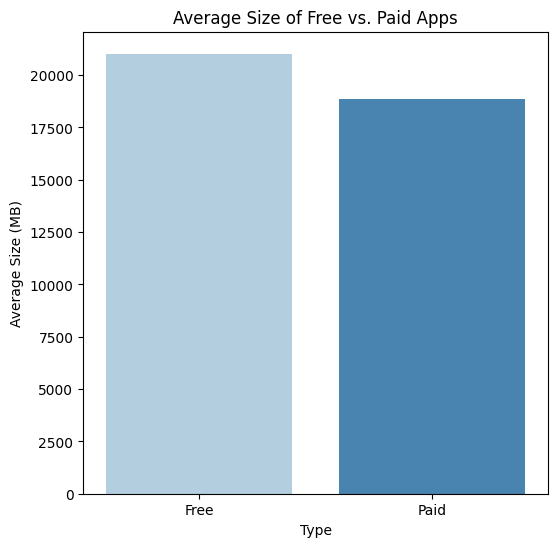

In [224]:
plt.figure(figsize=(6,6))
sns.barplot(x= df_avg_size_free_paid.index ,y=df_avg_size_free_paid.values, palette="Blues")
plt.xlabel('Type')
plt.ylabel('Average Size (MB)')
plt.title("Average Size of Free vs. Paid Apps")
plt.show()

/tmp/ipython-input-2062893537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =df, x='Type', y='Size', palette='Blues', estimator=np.mean)


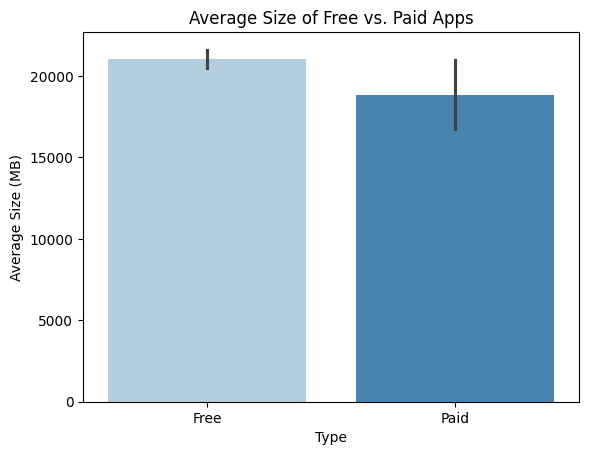

In [134]:
sns.barplot(data =df, x='Type', y='Size', palette='Blues', estimator=np.mean)
plt.xlabel('Type')
plt.ylabel('Average Size (MB)')
plt.title("Average Size of Free vs. Paid Apps")
plt.show()

#### 4.	What are the top 5 most expensive apps with a perfect rating (5)?



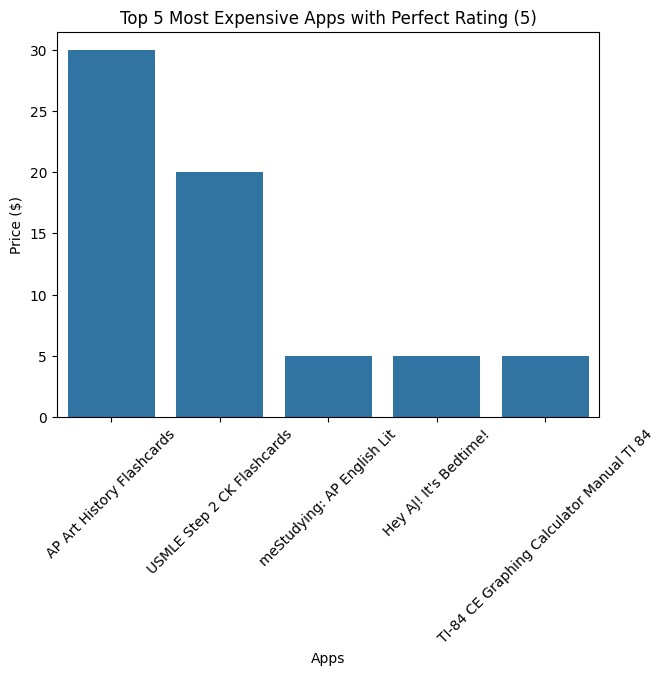

In [147]:
df_perfect_rating = df[(df['Rating'] == 5) & (df['Price'] > 0)].sort_values(by = 'Price', ascending=False).head(5)
plt.figure(figsize=(7,5))
sns.barplot(x=df_perfect_rating['App'], y=df_perfect_rating['Price'])
plt.ylabel('Price ($)')
plt.xlabel('Apps')
plt.title("Top 5 Most Expensive Apps with Perfect Rating (5)")
plt.xticks(rotation=45)
plt.show()

#### 5.	How many apps have received more than 50K reviews?

In [155]:
df['Reviews'].max()

78158306

In [164]:
x = df[df['Reviews'] > 50000].shape[0]
y = df[df['Reviews'] <= 50000].shape[0]
counts = [x,y]
lables = ['More than 50K', 'Less than 50K']
explode_x = (0.1,0)



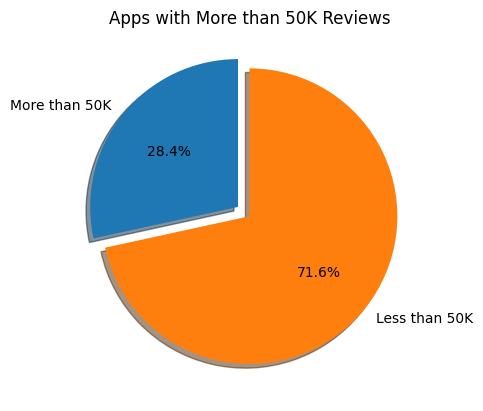

In [166]:
plt.pie(counts, labels=lables , explode=explode_x, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Apps with More than 50K Reviews')
plt.show()

#### 6.	What is the average price of apps, grouped by genre and number of installs?



In [172]:
df_avg_price_genre = df.groupby(['main_genre'])['Price'].mean()

In [173]:
df_avg_price_genre

,Price
main_genre,
Action,0.253379
Adventure,0.751124
Arcade,0.289955
Art & Design,0.093281
Auto & Vehicles,0.027260
Beauty,0.000000
Board,0.899167
Books & Reference,0.155698
Business,0.238556


#### 7.	How many apps have a rating higher than 4.7, and what is their average price?

In [184]:
 df_higher = df[df['Rating'] > 4.7]
 df_higher.shape[0]  #rating higher than 4.7

586

In [185]:
avg = df_higher['Price'].mean()  #their average price
avg

np.float64(0.455)

#### 8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
* *(Assuming Google takes a 30% cut from app sales)*








In [209]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [210]:
df_revenue = df[df['Installs'] >= 5000000]

In [212]:
total_revenue = (df_revenue['Price']*df_revenue['Installs']).sum()
google_revenue = total_revenue * 0.3
print(f"Google's estimated revenue from apps with 5,000,000+ installs = {google_revenue}")

Google's estimated revenue from apps with 5,000,000+ installs = 44910000.0


#### 9.	What are the maximum and minimum sizes of free vs. paid apps?

In [188]:
min_size = df.groupby('Type')['Size'].min()
min_size

,Size
Type,
Free,1.0
Paid,1.0


/tmp/ipython-input-1632960155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=min_size.index, y=min_size.values, palette='magma')


<Axes: xlabel='Type'>

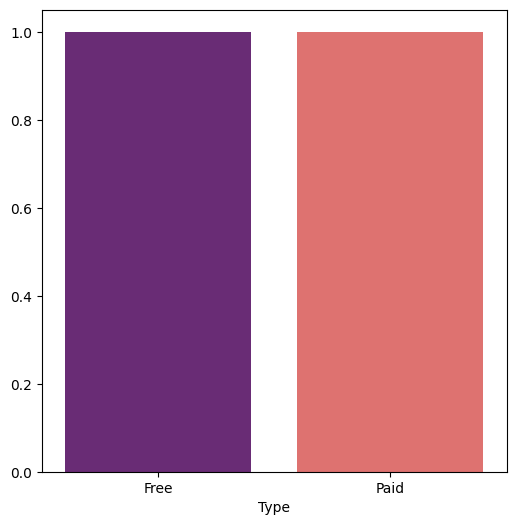

In [225]:
plt.figure(figsize=(6,6))
sns.barplot(x=min_size.index, y=min_size.values, palette='magma')

In [189]:
max_size = df.groupby('Type')['Size'].max()
max_size

,Size
Type,
Free,100000.0
Paid,100000.0


/tmp/ipython-input-2241071480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_size.index, y=max_size.values, palette='magma')


<Axes: xlabel='Type'>

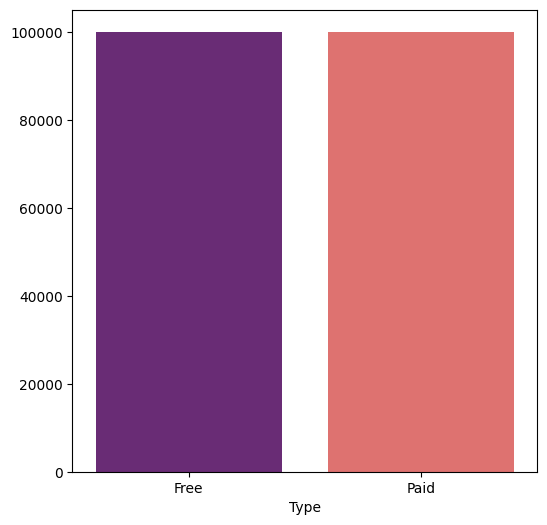

In [226]:
plt.figure(figsize=(6,6))
sns.barplot(x=max_size.index, y=max_size.values, palette='magma')

/tmp/ipython-input-1695095017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Size', data=df, palette='magma')
/tmp/ipython-input-1695095017.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


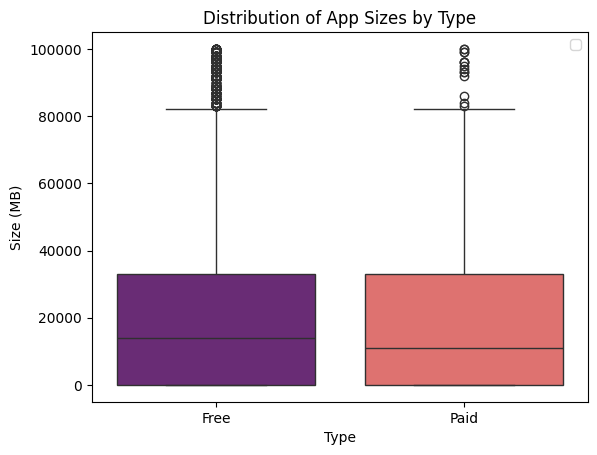

In [196]:
sns.boxplot(x='Type', y='Size', data=df, palette='magma')
plt.xlabel('Type')
plt.title("Distribution of App Sizes by Type")
plt.ylabel("Size (MB)")
plt.legend()
plt.show()

#### 10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [202]:
cols = ['Rating', 'Reviews', 'Size', 'Price']
corr_matrix = df[cols].corr()


In [203]:
print(corr_matrix)

           Rating   Reviews      Size     Price
Rating   1.000000  0.068724  0.080063 -0.022371
Reviews  0.068724  1.000000  0.236126 -0.009562
Size     0.080063  0.236126  1.000000 -0.026730
Price   -0.022371 -0.009562 -0.026730  1.000000


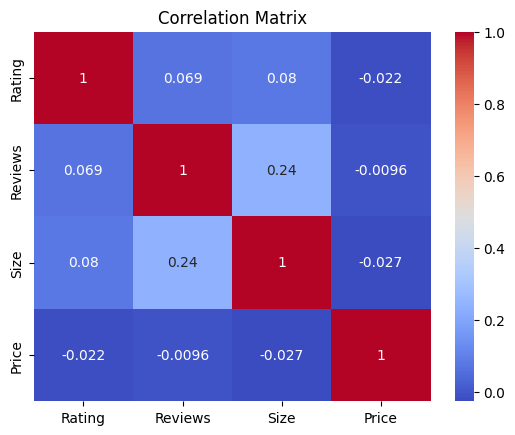

In [204]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 11.	How many apps exist for each type (free/paid) across different content ratings?

#### 12.	How many apps are compatible with Android version 4.x?

In [206]:
df_android_ver4 = df[df['Android Ver'].str.startswith('4.')]
print(f"{df_android_ver4.shape[0]} apps are compatible with Android version 4.x")


5602 apps are compatible with Android version 4.x
